Using image: cat_0251.jpg


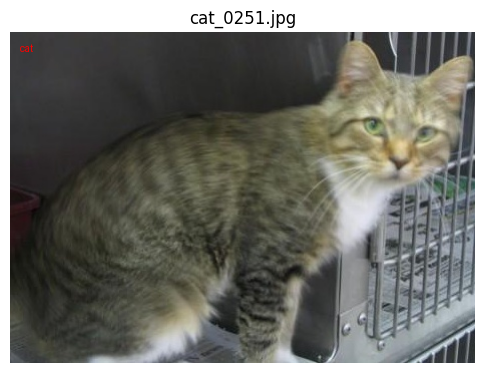

In [ ]:
from ultralytics import YOLO
import glob
import random
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import os

dataset_dir = "/home/ubuntu/Downloads/archive(13)/natural_images"

image_files = glob.glob(os.path.join(dataset_dir, "**/*.jpg"), recursive=True)
image_files += glob.glob(os.path.join(dataset_dir, "**/*.png"), recursive=True)


img_path = random.choice(image_files)
print(f"Using image: {os.path.basename(img_path)}")

model = YOLO("yolov8n.pt")


results = model.predict(source=img_path, verbose=False)
res = results[0]


labels = [model.names[int(b.cls)] for b in res.boxes]
if not labels:
    labels = ["No objects detected"]


img = Image.open(img_path).convert("RGB")
draw = ImageDraw.Draw(img)
try:
    font = ImageFont.truetype("arial.ttf", 20)
except:
    font = ImageFont.load_default()

y = 10
for label in labels:
    draw.text((10, y), label, fill="red", font=font)
    y += 25

plt.figure(figsize=(6,6))
plt.imshow(img)
plt.axis('off')
plt.title(os.path.basename(img_path))
plt.show()
